<a href="https://colab.research.google.com/github/DevendraSiShekhawat/Prodigy_ML_02/blob/main/Prodigy_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [5]:
customer = pd.read_csv('customer.csv')

In [6]:
customer.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
label_encoder = LabelEncoder()     #encode categorical values into numerical for features
customer['Gender'] = label_encoder.fit_transform(customer['Gender'])

In [9]:
customer.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [28]:
#feature scaling
#first select features for scaling
features = customer[['Gender', 'Age', 'Spending Score (1-100)']]

In [29]:
features.head()

,Gender,Age,Spending Score (1-100)
0,1,19,39
1,1,21,81
2,0,20,6
3,0,23,77
4,0,31,40


In [15]:
scaling = StandardScaler()
scaled_features = scaling.fit_transform(features)

In [30]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [19]:
# Determine the optimal number of clusters using the elbow method and silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

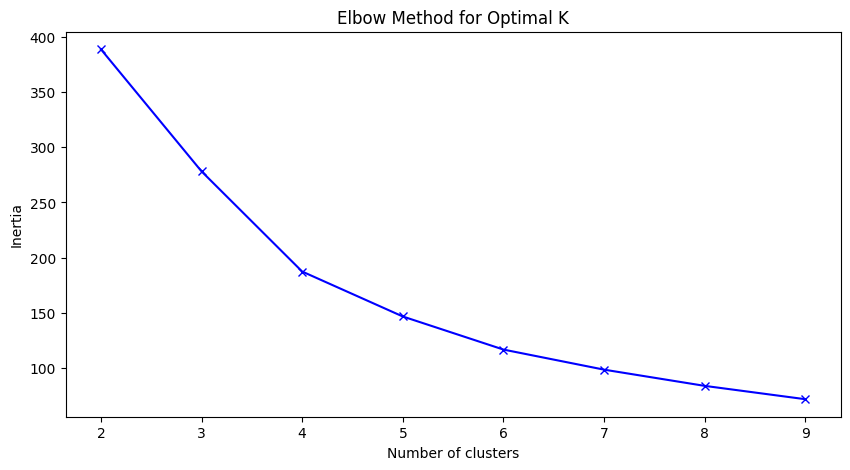

In [20]:
# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

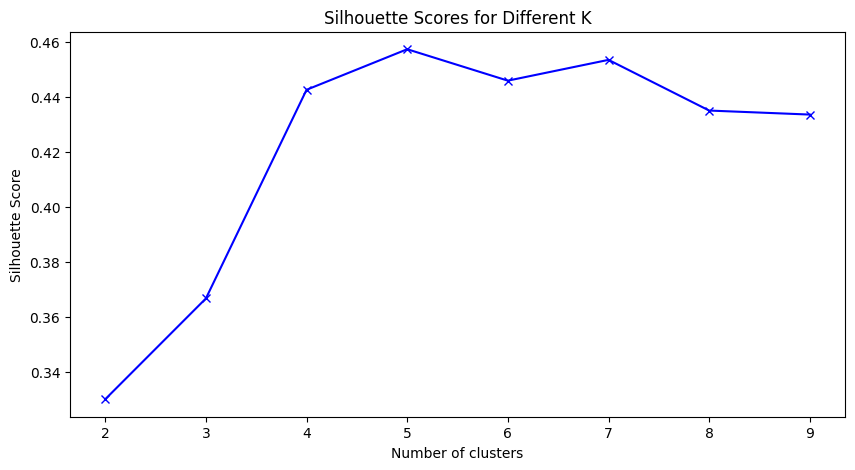

In [21]:
# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.show()

In [48]:
# Choose the optimal K based on the elbow method and silhouette scores
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
# Add the cluster labels to the original data
customer['Cluster'] = clusters

In [50]:
# Evaluation
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_score(scaled_features, clusters)}')

Silhouette Score for 5 clusters: 0.4573588359194229


In [32]:
# Inspect the clustering
print(customer.groupby('Cluster').mean())

         CustomerID  Gender        Age  Annual Income (k$)  \
Cluster                                                      
0        104.958333     1.0  49.437500           62.416667   
1        100.210526     0.0  28.438596           59.666667   
2         94.818182     0.0  48.109091           58.818182   
3        103.375000     1.0  28.250000           62.000000   

         Spending Score (1-100)  
Cluster                          
0                     29.208333  
1                     67.684211  
2                     34.781818  
3                     71.675000  


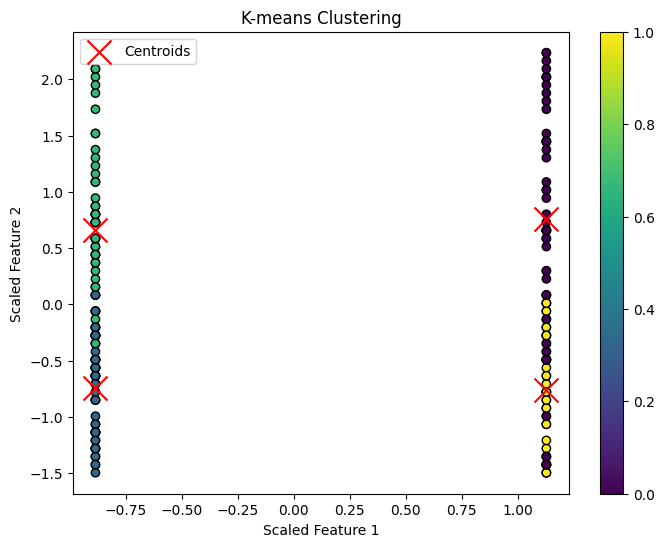

In [34]:
# Visualize clusters (assuming 2D visualization for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend()
plt.colorbar()
plt.show()